In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# read_data
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [4]:
# split data into train test
X = df.drop(columns = "charges")
y = df["charges"]
X_train, X_test, y_train, y_test = tts(X,y,
                                       test_size = 0.25, random_state = 42)
X_train.shape,X_test.shape

((1002, 6), (335, 6))

In [5]:
result_df = pd.DataFrame({
    "method": [],
    "r2_train": [],
    "r2_test": [],
    "adj_r2_train": [],
    "adj_r2_test": [],
    "train_mae": [],
    "test_mae":[]
})

In [6]:
def evaluation(method,X_train, X_test, y_train, y_test):
  model = LinearRegression()
  n_r_train, n_c_train = X_train.shape
  n_r_test,  n_c_test = X_test.shape

  # model fit
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # r2 score
  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  # adj r2
  adj_r2_train = 1 - ((1 - train_r2)*(n_r_train - 1)/ (n_r_train - n_c_train - 1))
  adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1))

  # mae
  train_mae = mean_absolute_error(y_train, y_pred_train)
  test_mae = mean_absolute_error(y_test, y_pred_test)

  temp_df = pd.DataFrame({
    "method": [method],
    "r2_train": [round(train_r2,4)],
    "r2_test": [round(test_r2,4)],
    "adj_r2_train": [round(adj_r2_train,4)],
    "adj_r2_test": [round(adj_r2_test,4)],
    "train_mae": [round(train_mae,4)],
    "test_mae":[round(test_mae,4)]
      })
  global result_df
  result_df = pd.concat([result_df, temp_df]).reset_index(drop = True)


  # print(f"r2 score---")
  # print(f"train_r2: {round(train_r2,4)}, test_r2: {round(test_r2,4)}")
  # print("-----------------")
  # print(f"adj r2 score---")
  # print(f"train_adj_r2: {round(adj_r2_train,4)}, test_adj_r2: {round(adj_r2_test,4)}")
  # print("-----------------")
  # print(f"MAE---")
  # print(f"train_mae: {round(train_mae,4)}, test_mae: {round(test_mae,4)}")
  # print("-----------------")
  return result_df


In [7]:
X_train

,age,sex,bmi,children,smoker,region
763,27,male,26.03,0,no,northeast
1079,63,male,33.66,3,no,southeast
178,46,female,28.90,2,no,southwest
287,63,female,26.22,0,no,northwest
1290,38,female,19.95,2,no,northeast
...,...,...,...,...,...,...
1096,51,female,34.96,2,yes,northeast
1131,27,male,45.90,2,no,southwest
1295,20,male,22.00,1,no,southwest
861,38,female,28.00,3,no,southwest


In [8]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
ord = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1)

X_train_enc[ord.get_feature_names_out()] = ord.fit_transform(X_train[["sex", "smoker", "region"]])
X_test_enc[ord.get_feature_names_out()] = ord.transform(X_test[["sex", "smoker", "region"]])


In [ ]:
X_train_enc.head()

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0


In [10]:
# baseline model
evaluation("baseline", X_train_enc, X_test_enc, y_train, y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774


In [ ]:
# taking log of y
evaluation("log y", X_train_enc, X_test_enc, np.log(y_train), np.log(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574


In [ ]:
# taking sqrt of y
evaluation("sqrt of y", X_train_enc, X_test_enc, np.sqrt(y_train), np.sqrt(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861


In [11]:
X_train_enc

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0
...,...,...,...,...,...,...
1096,51,0.0,34.96,2,1.0,0.0
1131,27,1.0,45.90,2,0.0,3.0
1295,20,1.0,22.00,1,0.0,3.0
861,38,0.0,28.00,3,0.0,3.0


In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias = False)
poly.fit_transform(X_train_enc).shape

(1002, 27)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias = False)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train_enc),
             columns = poly.get_feature_names_out(), index = X_train.index)
X_test_poly = pd.DataFrame(poly.transform(X_test_enc),
             columns = poly.get_feature_names_out(), index = X_test.index)

In [ ]:
# polynomial features of degree 3 for all data
evaluation("poly degree 2 all columns without sqrt", X_train_poly, X_test_poly, y_train,y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,poly degree 2 all columns without sqrt,0.8330,0.8753,0.8283,0.8643,2920.3642,2858.1790


In [ ]:
# polynomial features of degree 3 for all data
evaluation("poly degree 2 all columns with sqrt", X_train_poly, X_test_poly, np.sqrt(y_train),np.sqrt(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,poly degree 2 all columns without sqrt,0.8330,0.8753,0.8283,0.8643,2920.3642,2858.1790
4,poly degree 2 all columns with sqrt,0.8271,0.8744,0.8223,0.8633,11.6488,11.1811


In [ ]:
# feature selection
# pvalue
# mi
# lasso
# corr/vif

In [ ]:
# p- values
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_enc)
# X_test_sm = sm.add_constant(X_test_enc)
model = sm.OLS(y_train, X_train_sm)
model_fit = model.fit()
model_fit.summary()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
p_value_imp_col = ["age", "bmi", "children", "smoker"]

In [ ]:
X_train_sm = sm.add_constant(X_train_enc[p_value_imp_col])
print(X_train_sm.shape)
# X_test_sm = sm.add_constant(X_test_enc)
model = sm.OLS(y_train, X_train_sm)
model_fit = model.fit()
model_fit.summary()

NameError: name 'sm' is not defined

In [ ]:
model_fit.pvalues

NameError: name 'model_fit' is not defined

In [ ]:
y_pred_test = model_fit.predict(X_test_enc[p_value_imp_col])
mean_absolute_error(y_test, y_pred_test)

NameError: name 'model_fit' is not defined

In [ ]:
y_pred_test = model_fit.predict(sm.add_constant(X_test_enc[p_value_imp_col]))
mean_absolute_error(y_test, y_pred_test)

NameError: name 'model_fit' is not defined

In [ ]:
# polynomial features of degree 3 for all data
evaluation("imp_p_value_col", X_train_enc[p_value_imp_col], X_test_enc[p_value_imp_col],
           y_train,y_test)

NameError: name 'p_value_imp_col' is not defined

In [ ]:
# mutual info
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train_enc, y_train)
mi_scores

mi = pd.DataFrame()

mi["col_name"] = X_train_enc.columns
mi["mi_score"] = mi_scores

mi.sort_values(by = "mi_score", ascending = False)

,col_name,mi_score
0,age,1.426390
4,smoker,0.357333
3,children,0.156869
1,sex,0.117425
2,bmi,0.084672
5,region,0.065651


<Axes: >

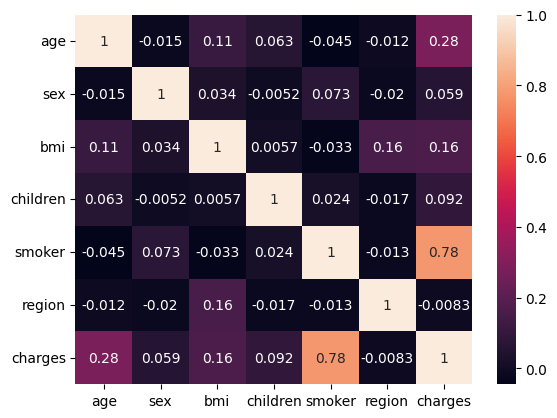

In [ ]:
X_corr = X_train_enc.copy()
X_corr["charges"] = y_train
sns.heatmap(X_corr.corr(), annot = True, fmt = ".2g")

<Axes: >

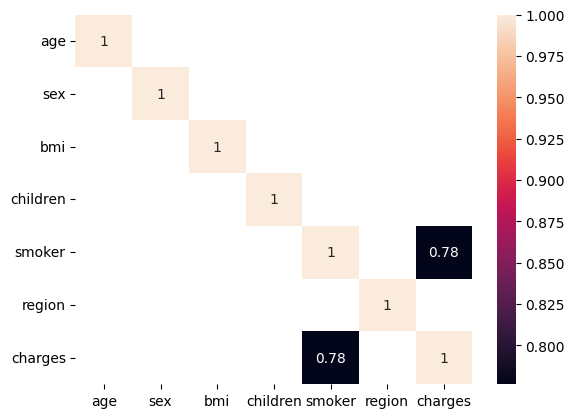

In [ ]:
sns.heatmap(X_corr.corr()[np.abs(X_corr.corr())>0.5], annot = True)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif = calc_vif(X_train_enc)
vif.sort_values(by = ["VIF"], ascending = False)

ModuleNotFoundError: No module named 'statsmodels'

A VIF less than 5 indicates a low correlation of that predictor with other predictors. A value between 5 and 10 indicates a moderate correlation, while VIF values larger than 10 are a sign for high, not tolerable correlation of model predictors (James et al. 2013)

In [ ]:
# lasso
model_lasso = Lasso(alpha=1000)
model_lasso.fit(X_train_enc, y_train)
col_df = pd.DataFrame({
    "col_name": X_train_enc.columns,
    "lasso_coef": model_lasso.coef_
})
col_df

,col_name,lasso_coef
0,age,238.038354
1,sex,0.000000
2,bmi,269.481524
3,children,0.000000
4,smoker,16935.142973
5,region,-0.000000


- p_value_imp_col = ["age", "bmi", "children", "smoker"]
- mi_imp_col = ["age", "children", "smoker"]
- corr/vif = ["age", "children", "smoker", "region", "sex"]
- lasso = ["age", "bmi", "children", "smoker"]

In [15]:
lasso = ["age", "bmi", "children", "smoker"]
poly = PolynomialFeatures(2, include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc[lasso])
X_test_poly = poly.transform(X_test_enc[lasso])
evaluation("poly with degree 2 imp cols sqrt y", X_train_poly, X_test_poly, np.sqrt(y_train), np.sqrt(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,poly with degree 2 imp cols sqrt y,0.8220,0.8686,0.8195,0.8629,11.7491,11.2049


In [ ]:
X_train[:5]

,age,sex,bmi,children,smoker,region
763,27,male,26.03,0,no,northeast
1079,63,male,33.66,3,no,southeast
178,46,female,28.90,2,no,southwest
287,63,female,26.22,0,no,northwest
1290,38,female,19.95,2,no,northeast


In [ ]:
X_train_enc[:5]

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0


In [10]:
lasso = ["age", "bmi", "children", "smoker"]
poly = PolynomialFeatures((2,4), include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc[lasso])
X_test_poly = poly.transform(X_test_enc[lasso])

model = LinearRegression()
model.fit(X_train_poly, np.sqrt(y_train))
y_pred_train_sqrt = model.predict(X_train_poly)
y_pred_test_sqrt = model.predict(X_test_poly)
print(mean_absolute_error(y_train, y_pred_train_sqrt**2))
print(mean_absolute_error(y_test, y_pred_test_sqrt**2))

2508.393316480776
2502.9962464662653


In [11]:
poly = PolynomialFeatures((3,4), include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc[lasso])
X_test_poly = poly.transform(X_test_enc[lasso])
evaluation("poly with degree (3,4) imp cols log y", X_train_poly, X_test_poly, np.log(y_train), np.log(y_test))



,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,"poly with degree (3,4) imp cols log y",0.8198,0.8568,0.8094,0.8285,0.2148,0.2055


In [12]:
model = LinearRegression()
model.fit(X_train_poly, np.log(y_train))
y_pred_train_sqrt = model.predict(X_train_poly)
y_pred_test_sqrt = model.predict(X_test_poly)
print(mean_absolute_error(y_train, np.exp(y_pred_train_sqrt)))
print(mean_absolute_error(y_test, np.exp(y_pred_test_sqrt)))

2471.433959594844
2441.2405463273712


In [ ]:
model.coef_

array([ 1.57531390e-05,  3.05395254e-05,  2.67521817e-04, -1.03816569e-03,
        1.49768780e-05, -1.71367954e-03,  1.07886471e-04,  1.75642720e-03,
        9.16255815e-03,  1.90376052e-02, -3.35614252e-05,  2.15381807e-03,
        5.47050108e-03, -3.05034059e-03, -1.88286159e-02, -1.26676310e-01,
        1.40563864e-02,  4.50859206e-02, -3.06205242e-02,  1.62690165e+00,
       -2.77963328e-07,  3.15025676e-07,  2.58393733e-07,  1.59497729e-05,
       -1.57509219e-06,  4.98649079e-06,  1.55704807e-05, -7.40160623e-05,
       -2.29762783e-04, -1.03813380e-03,  1.06058437e-06,  1.44996441e-05,
       -3.61689574e-05,  6.18529411e-05,  2.19296399e-04,  1.07890446e-04,
        4.65847827e-04, -2.61612234e-04,  9.16255941e-03,  1.90376042e-02,
        2.08666997e-07, -3.63762458e-05, -1.06888630e-04,  3.30544862e-05,
        4.52901282e-04,  5.47050062e-03, -3.69087216e-04, -1.08767564e-03,
       -1.88286159e-02, -1.26676312e-01, -3.05966821e-03, -9.53248616e-03,
        4.50859207e-02, -

In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('insurance_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
# load saved model
with open('insurance_pkl' , 'rb') as f:
    lr = pickle.load(f)

lr.coef_

array([ 1.57531390e-05,  3.05395254e-05,  2.67521817e-04, -1.03816569e-03,
        1.49768780e-05, -1.71367954e-03,  1.07886471e-04,  1.75642720e-03,
        9.16255815e-03,  1.90376052e-02, -3.35614252e-05,  2.15381807e-03,
        5.47050108e-03, -3.05034059e-03, -1.88286159e-02, -1.26676310e-01,
        1.40563864e-02,  4.50859206e-02, -3.06205242e-02,  1.62690165e+00,
       -2.77963328e-07,  3.15025676e-07,  2.58393733e-07,  1.59497729e-05,
       -1.57509219e-06,  4.98649079e-06,  1.55704807e-05, -7.40160623e-05,
       -2.29762783e-04, -1.03813380e-03,  1.06058437e-06,  1.44996441e-05,
       -3.61689574e-05,  6.18529411e-05,  2.19296399e-04,  1.07890446e-04,
        4.65847827e-04, -2.61612234e-04,  9.16255941e-03,  1.90376042e-02,
        2.08666997e-07, -3.63762458e-05, -1.06888630e-04,  3.30544862e-05,
        4.52901282e-04,  5.47050062e-03, -3.69087216e-04, -1.08767564e-03,
       -1.88286159e-02, -1.26676312e-01, -3.05966821e-03, -9.53248616e-03,
        4.50859207e-02, -

In [13]:
import joblib
joblib.dump(model, "insurance_joblib")

['insurance_joblib']

In [14]:
lr2 = joblib.load("insurance_joblib")
lr2.coef_

array([ 1.57531390e-05,  3.05395254e-05,  2.67521817e-04, -1.03816569e-03,
        1.49768780e-05, -1.71367954e-03,  1.07886471e-04,  1.75642720e-03,
        9.16255815e-03,  1.90376052e-02, -3.35614252e-05,  2.15381807e-03,
        5.47050108e-03, -3.05034059e-03, -1.88286159e-02, -1.26676310e-01,
        1.40563864e-02,  4.50859206e-02, -3.06205242e-02,  1.62690165e+00,
       -2.77963328e-07,  3.15025676e-07,  2.58393733e-07,  1.59497729e-05,
       -1.57509219e-06,  4.98649079e-06,  1.55704807e-05, -7.40160623e-05,
       -2.29762783e-04, -1.03813380e-03,  1.06058437e-06,  1.44996441e-05,
       -3.61689574e-05,  6.18529411e-05,  2.19296399e-04,  1.07890446e-04,
        4.65847827e-04, -2.61612234e-04,  9.16255941e-03,  1.90376042e-02,
        2.08666997e-07, -3.63762458e-05, -1.06888630e-04,  3.30544862e-05,
        4.52901282e-04,  5.47050062e-03, -3.69087216e-04, -1.08767564e-03,
       -1.88286159e-02, -1.26676312e-01, -3.05966821e-03, -9.53248616e-03,
        4.50859207e-02, -

In [ ]:
lasso

['age', 'bmi', 'children', 'smoker']

In [ ]:
X_train["children"].unique()

array([0, 3, 2, 1, 4, 5])

In [15]:
joblib.dump(poly, "poly_obj")

['poly_obj']

In [ ]:
poly_obj = joblib.load("poly_obj")


In [ ]:
test_data = [[100,28,2,1]]
poly_obj.transform(test_data)

c:\Users\goura\OneDrive\Desktop\streamlit_tutorial\ml_app1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.00000e+06, 2.80000e+05, 2.00000e+04, 1.00000e+04, 7.84000e+04,
        5.60000e+03, 2.80000e+03, 4.00000e+02, 2.00000e+02, 1.00000e+02,
        2.19520e+04, 1.56800e+03, 7.84000e+02, 1.12000e+02, 5.60000e+01,
        2.80000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+08, 2.80000e+07, 2.00000e+06, 1.00000e+06, 7.84000e+06,
        5.60000e+05, 2.80000e+05, 4.00000e+04, 2.00000e+04, 1.00000e+04,
        2.19520e+06, 1.56800e+05, 7.84000e+04, 1.12000e+04, 5.60000e+03,
        2.80000e+03, 8.00000e+02, 4.00000e+02, 2.00000e+02, 1.00000e+02,
        6.14656e+05, 4.39040e+04, 2.19520e+04, 3.13600e+03, 1.56800e+03,
        7.84000e+02, 2.24000e+02, 1.12000e+02, 5.60000e+01, 2.80000e+01,
        1.60000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00]])

In [ ]:
test_data = [[100,28,2,1]]
np.exp(lr2.predict(poly.transform(test_data)))

c:\Users\goura\OneDrive\Desktop\streamlit_tutorial\ml_app1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1974.00970076])

In [ ]:
df.groupby(by = "smoker")["charges"].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

<Axes: xlabel='age', ylabel='charges'>

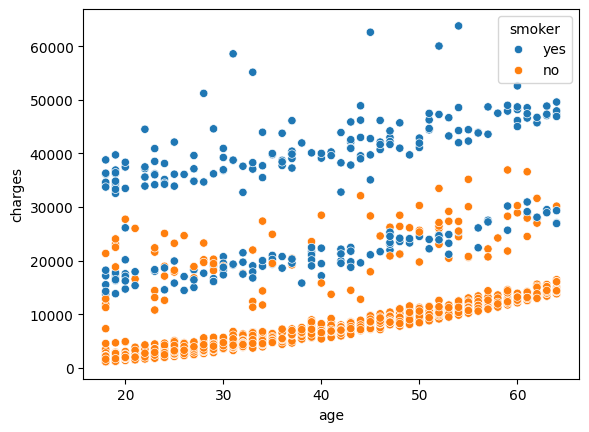

In [ ]:
sns.scatterplot(data = df, x = "age", y = "charges", hue = "smoker")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 4)
model.fit(X_train_poly, np.log(y_train))
y_pred_train_log = model.predict(X_train_poly)
y_pred_test_log = model.predict(X_test_poly)

train_err = mean_absolute_error(y_train, np.exp(y_pred_train_log))
test_err = mean_absolute_error(y_test, np.exp(y_pred_test_log))

train_err, test_err

(1986.7723260056998, 2074.3138431285042)

In [ ]:
smoker = "Yes"
0 if smoker == "No" else 1

1

In [ ]:

sklearn.__version__

'1.2.2'

In [ ]:
import sklearn

In [17]:
y_train

763      3070.8087
1079    15161.5344
178      8823.2790
287     14256.1928
1290     7133.9025
           ...    
1096    44641.1974
1131     3693.4280
1295     1964.7800
861      7151.0920
1127     5836.5204
Name: charges, Length: 1002, dtype: float64

In [18]:
X_train_enc.head()

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0


In [19]:
poly = PolynomialFeatures((3,4), include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc)
X_test_poly = poly.transform(X_test_enc)

In [20]:
model = LinearRegression()
model.fit(X_train_poly, np.log(y_train))

LinearRegression()

In [22]:
np.exp(model.predict(X_test_poly))

array([ 9055.54171477,  7239.20041328, 12936.87380689, 39465.09044009,
        5319.75749442,  9718.86985445, 52132.13247363,  2859.69782203,
        7820.44067783, 10745.01691579, 15844.0435724 , 32080.11393321,
       35727.56836434, 11353.08563863,  8045.15205747,  8110.07954222,
        2339.38253381, 35781.81413545,  3866.78623686,  4323.19056328,
        2281.84915691, 22715.03669686, 10719.13335044, 27925.14148842,
       35545.74739662,  6425.23783908, 62287.2801072 , 47898.42431663,
       11452.06509539, 17171.51081667,  4471.41834132,  9487.13169106,
        2529.90320588, 13805.93589752, 90999.23488988, 10465.49718913,
        9473.90182419,  5084.78655511, 22441.74507873,  8865.39720186,
        2594.89520707, 18029.18492957, 43834.24212861, 10413.85419897,
        7733.97311464,  3975.63818029,  2138.42421737,  7665.69983762,
        4696.90423655,  6599.15773391,  5085.82395329,  9529.46102966,
       23247.18538245,  1736.96264535,  7363.62816981,  7912.29755652,
      

In [24]:
X_train_enc.head()

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0


In [28]:
test_data = np.array([[25, 0, 25, 0, 0, 1]])
test_data = poly.transform(test_data)
y_pred = model.predict(test_data)
premium_amt = np.exp(y_pred)
premium_amt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([3424.91982758])

In [29]:
import joblib
joblib.dump(model, "insurance_model")

['insurance_model']

In [30]:
joblib.dump(ploy, "poly_obj")

['poly_obj']